# Advanced Pairs Trading : Kalman Filters

## Import library

In [14]:
import sys
sys.path.append('../../')

In [15]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [16]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [17]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [18]:
Currency_Pair = 'EURUSD'

## TF D1

In [19]:
TF = 'D1'

In [20]:
data_1 = XAUUSD[TF]

In [21]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

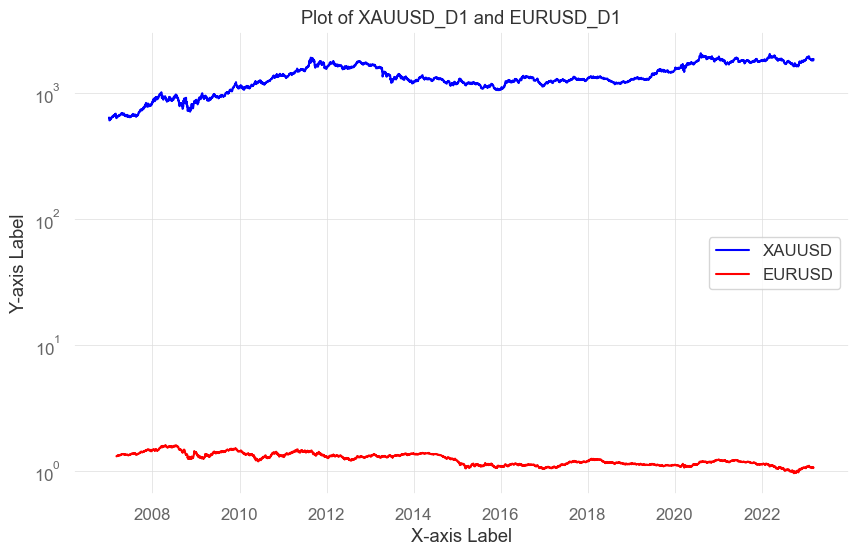

In [22]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [23]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [24]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          5.213e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:52:33   Log-Likelihood:                         -37217.
No. Observations:                5004   AIC:                                  7.444e+04
Df Residuals:                    5003   BIC:                                  7.444e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.9974      4.647    228.322      0.000    1051.887    1070.107
==============================================================================
Omnibus:                      155.460   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.867
Skew:                          -0.268   Prob(JB):                     3.10e-25
Kurtosis:                       2.495   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
result = KF.Run()

In [26]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.926084
Multiple (Buy-and-Hold):     3.702206
--------------------------------------
Out-/Underperformance:       -2.776122


CAGR:                        -0.004791
Annualized Mean:             -0.004803
Annualized Std:              0.023787
Sharpe Ratio:                -0.201907
Sortino Ratio:               -0.27436
Maximum Drawdown:            0.13239
Calmar Ratio:                -0.03619
Max Drawdown Duration:       5706 Days
Kelly Criterion:             -7.995701


### Save Result Backtest 

In [27]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [28]:
filename = f'{Currency_Pair}_{TF}.csv'

In [29]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -7.81%
CAGR﹪                     -0.35%

Sharpe                     -0.18
Prob. Sharpe Ratio         20.89%
Smart Sharpe               -0.18
Sortino                    -0.25
Smart Sortino              -0.24
Sortino/√2                 -0.17
Smart Sortino/√2           -0.17
Omega                      0.97

Max Drawdown               -13.5%
Longest DD Days            5706
Volatility (ann.)          2.13%
Calmar                     -0.03
Skew                       -0.66
Kurtosis                   9.4

Expected Daily %           -0.0%
Expected Monthly %         -0.04%
Expected Yearly %          -0.48%
Kelly Criterion            -1.76%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-19,2023-03-01,5706,-13.497854,-12.974549
2,2007-05-18,2007-06-01,2007-06-21,35,-0.183281,-0.182841
3,2007-05-03,2007-05-08,2007-05-14,12,-0.182156,-0.159340
4,2007-03-16,2007-04-16,2007-04-25,41,-0.174424,-0.167357
5,2007-03-08,2007-03-08,2007-03-12,5,-0.082259,-0.080157


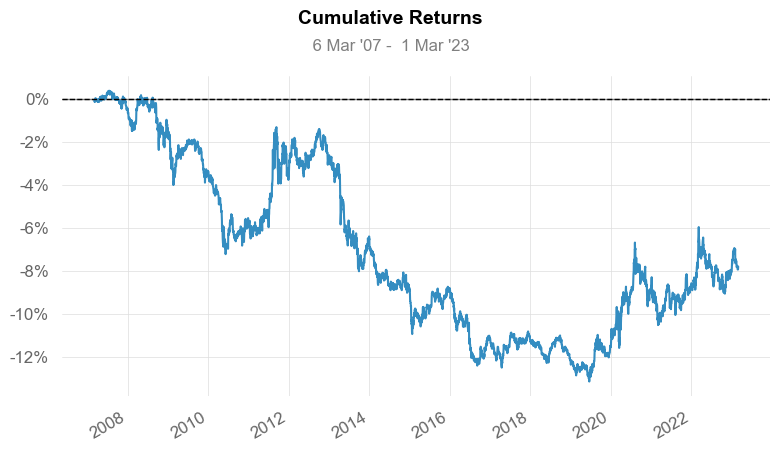

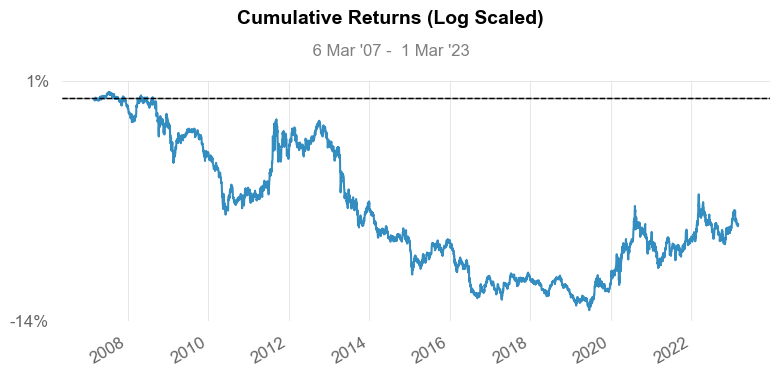

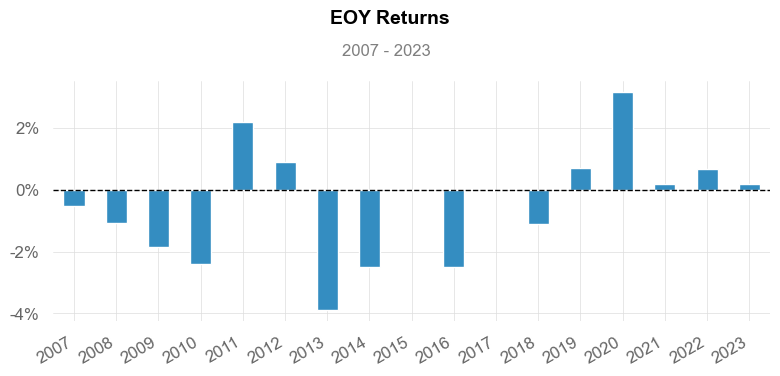

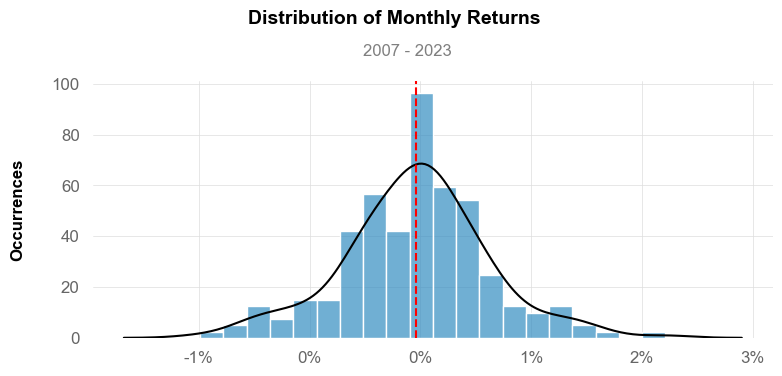

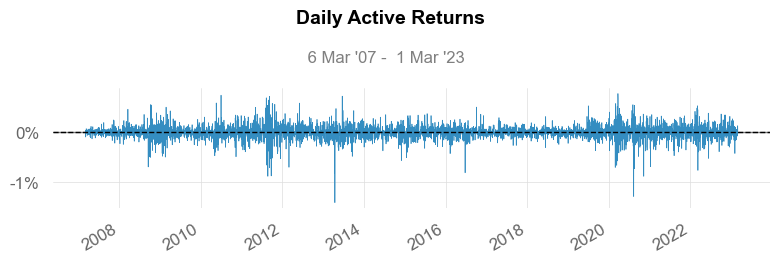

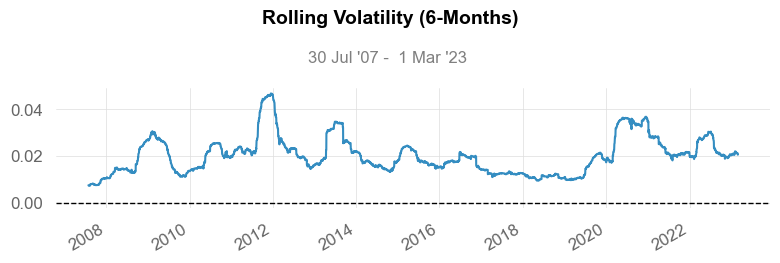

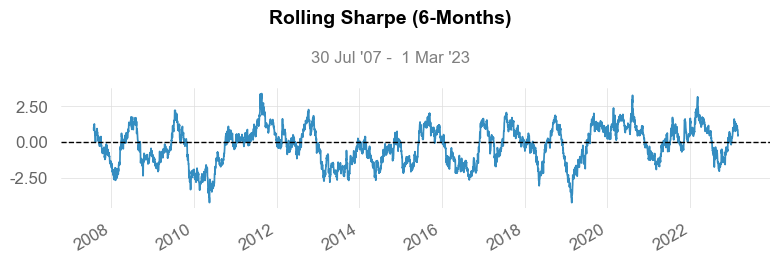

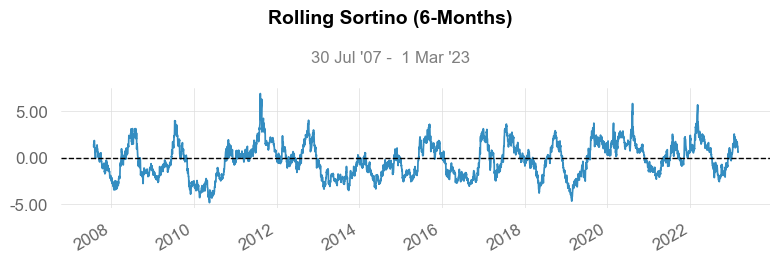

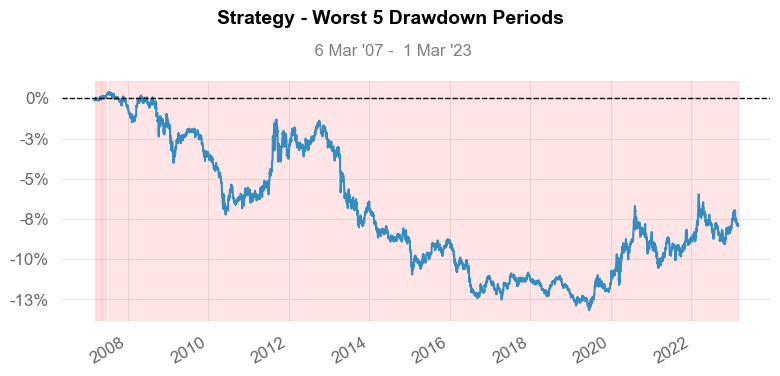

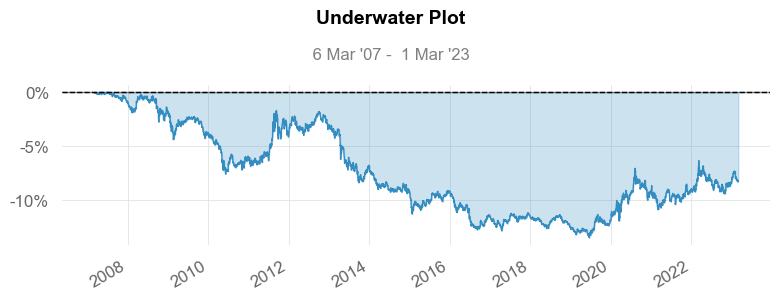

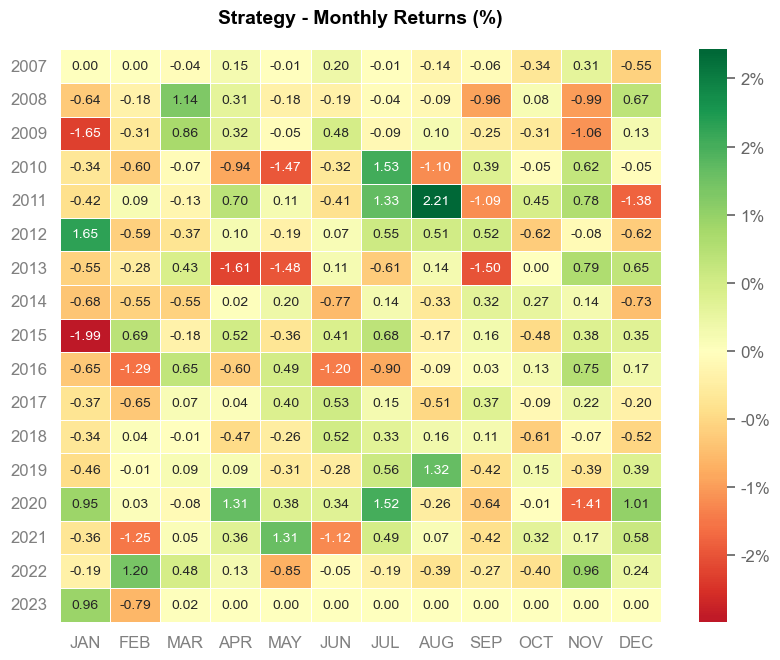

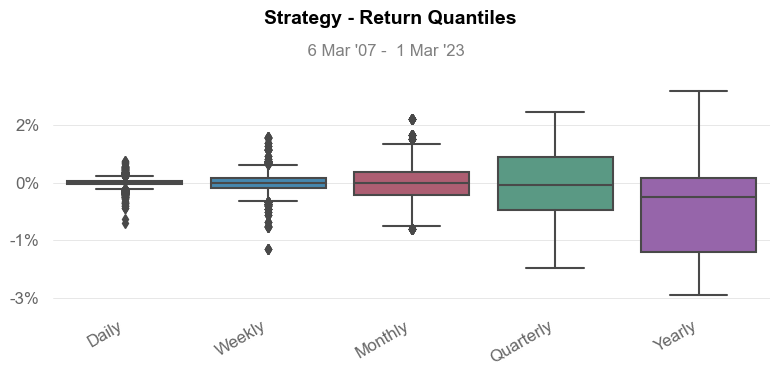

In [30]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [31]:
TF = 'H4'

In [32]:
data_1 = XAUUSD[TF]

In [33]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

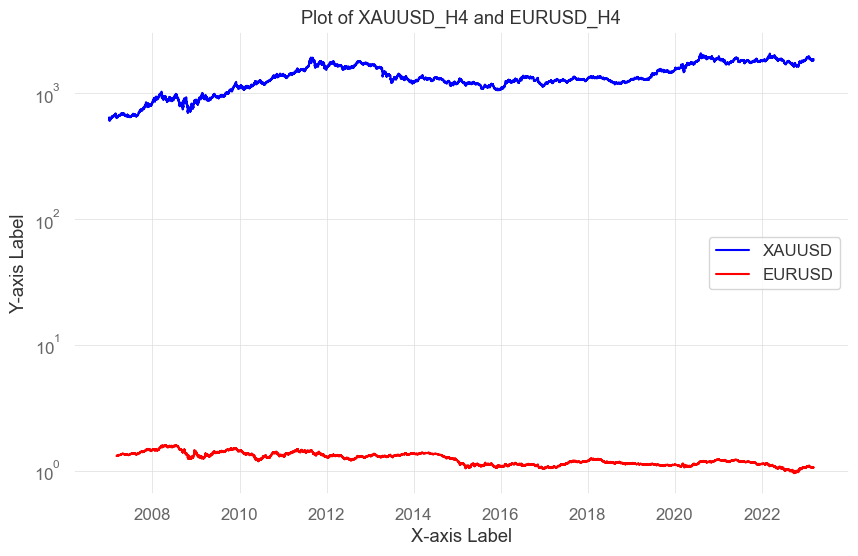

In [34]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [35]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [36]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          2.685e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:52:55   Log-Likelihood:                     -1.9193e+05
No. Observations:               25804   AIC:                                  3.839e+05
Df Residuals:                   25803   BIC:                                  3.839e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.7464      2.047    518.174      0.000    1056.734    1064.759
==============================================================================
Omnibus:                      814.083   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.883
Skew:                          -0.268   Prob(JB):                    5.99e-128
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result = KF.Run()

In [38]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.921411
Multiple (Buy-and-Hold):     3.647153
--------------------------------------
Out-/Underperformance:       -2.725742


CAGR:                        -0.005106
Annualized Mean:             -0.005119
Annualized Std:              0.023453
Sharpe Ratio:                -0.218274
Sortino Ratio:               -0.301899
Maximum Drawdown:            0.137904
Calmar Ratio:                -0.037026
Max Drawdown Duration:       5705 Days
Kelly Criterion:             -8.810123


### Save Result Backtest 

In [39]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [40]:
filename = f'{Currency_Pair}_{TF}.csv'

In [41]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -8.32%
CAGR﹪                     -0.37%

Sharpe                     -0.19
Prob. Sharpe Ratio         19.35%
Smart Sharpe               -0.19
Sortino                    -0.26
Smart Sortino              -0.26
Sortino/√2                 -0.19
Smart Sortino/√2           -0.18
Omega                      0.96

Max Drawdown               -14.01%
Longest DD Days            5706
Volatility (ann.)          2.14%
Calmar                     -0.03
Skew                       -0.66
Kurtosis                   9.44

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.51%
Kelly Criterion            -1.88%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-19,2023-03-01,5706,-14.006817,-13.372794
2,2007-05-18,2007-06-01,2007-06-21,35,-0.183159,-0.182720
3,2007-05-03,2007-05-08,2007-05-14,12,-0.182035,-0.159234
4,2007-03-16,2007-04-16,2007-04-25,41,-0.174308,-0.167245
5,2007-03-08,2007-03-08,2007-03-12,5,-0.082204,-0.080104


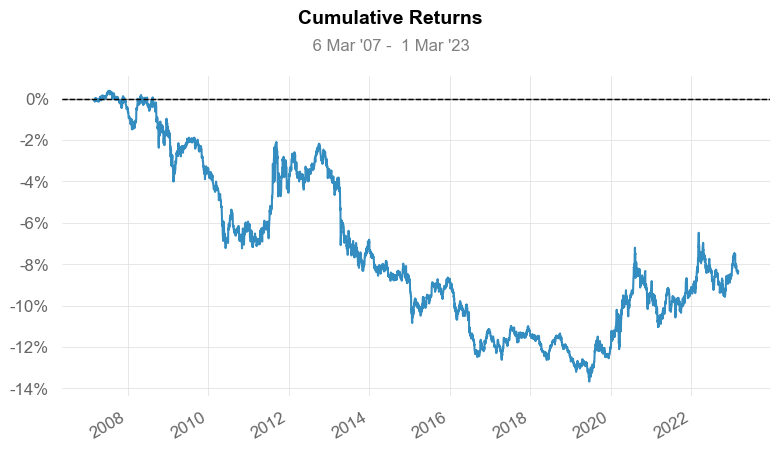

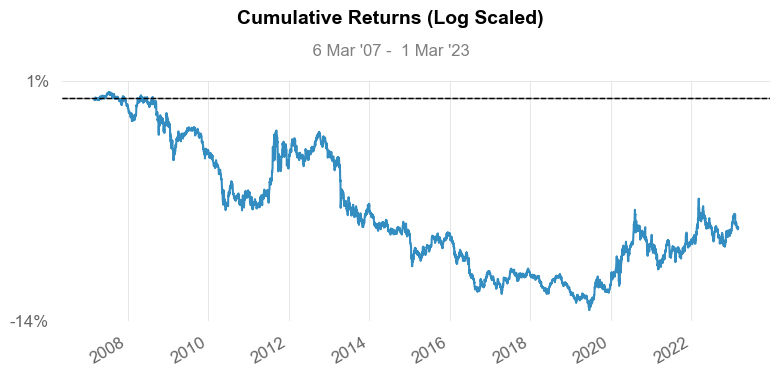

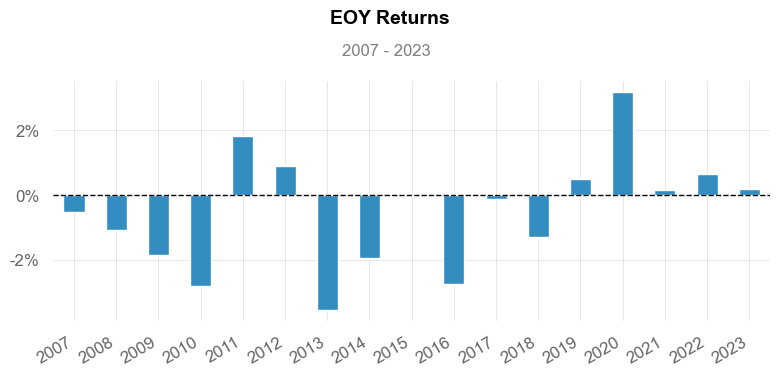

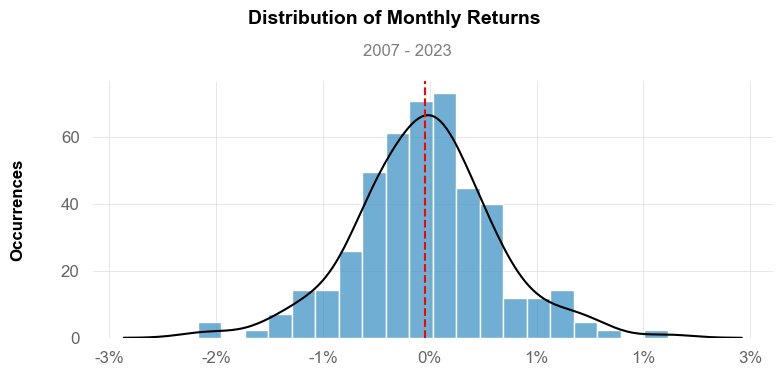

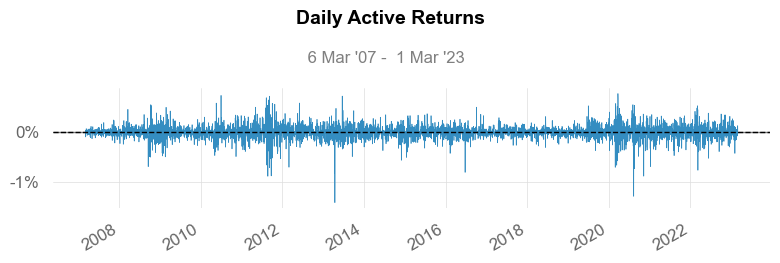

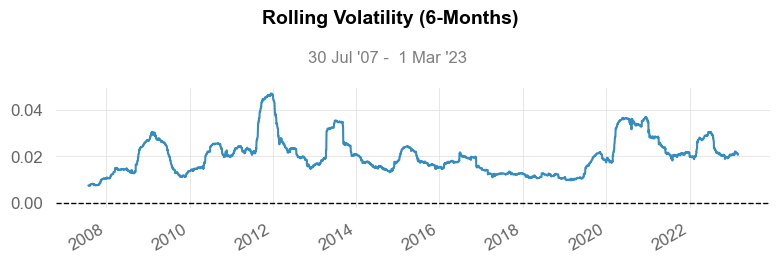

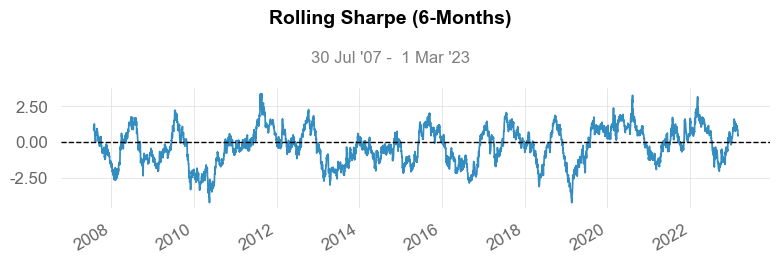

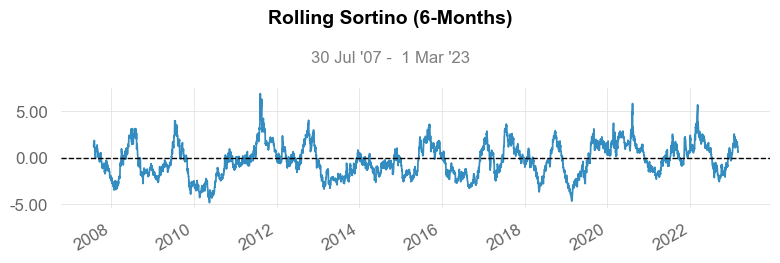

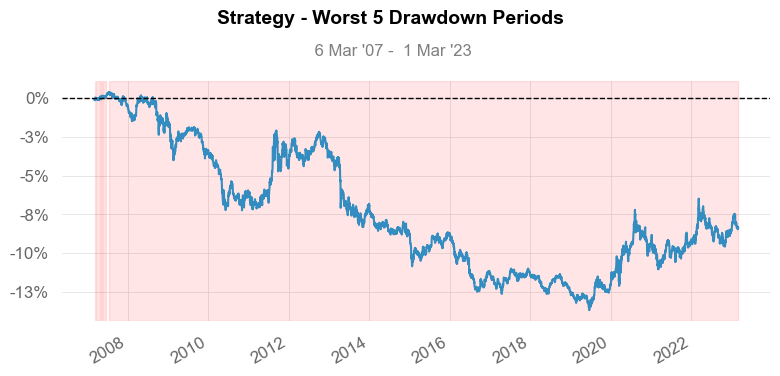

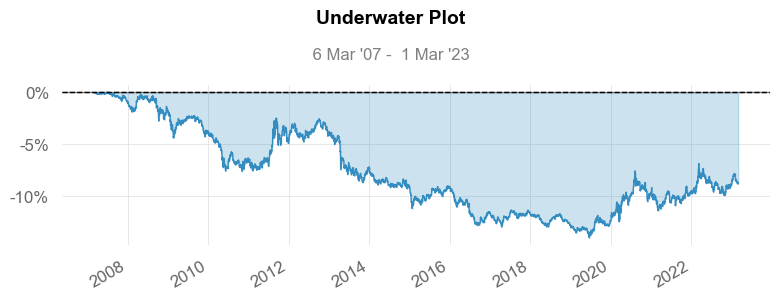

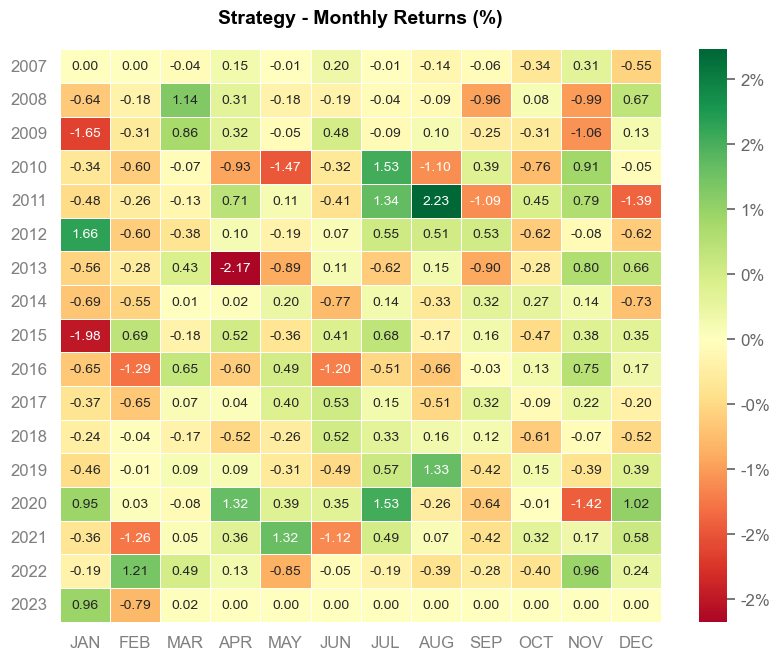

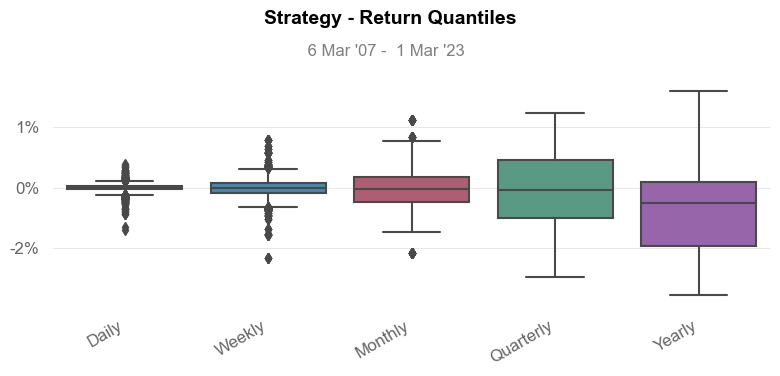

In [42]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [43]:
TF = 'H1'

In [44]:
data_1 = XAUUSD[TF]

In [45]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

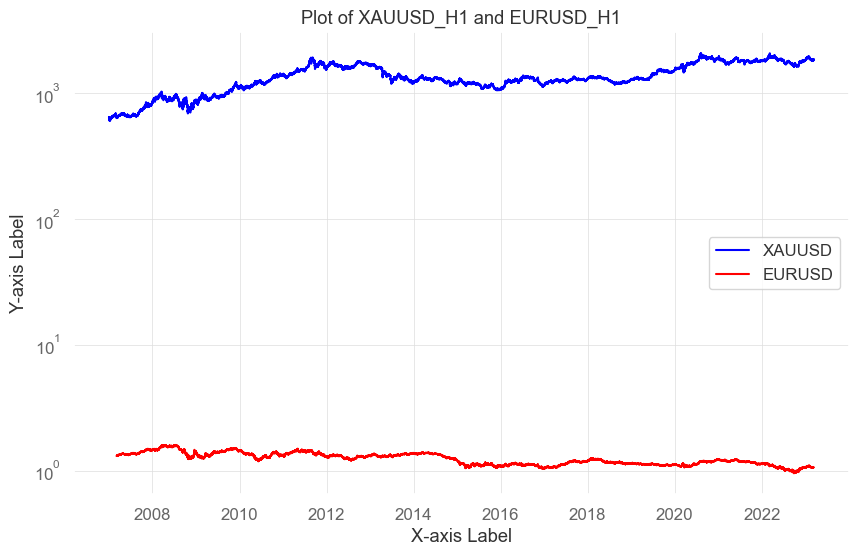

In [46]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [47]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [48]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          1.039e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:54:08   Log-Likelihood:                     -7.4267e+05
No. Observations:               99848   AIC:                                  1.485e+06
Df Residuals:                   99847   BIC:                                  1.485e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.6817      1.041   1019.207      0.000    1058.642    1062.721
==============================================================================
Omnibus:                     3156.922   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2268.535
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
result = KF.Run()

### Save Result Backtest 

In [50]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [51]:
filename = f'{Currency_Pair}_{TF}.csv'

In [52]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -8.05%
CAGR﹪                     -0.36%

Sharpe                     -0.19
Prob. Sharpe Ratio         20.19%
Smart Sharpe               -0.18
Sortino                    -0.25
Smart Sortino              -0.25
Sortino/√2                 -0.18
Smart Sortino/√2           -0.18
Omega                      0.96

Max Drawdown               -13.79%
Longest DD Days            5706
Volatility (ann.)          2.14%
Calmar                     -0.03
Skew                       -0.67
Kurtosis                   9.69

Expected Daily %           -0.0%
Expected Monthly %         -0.04%
Expected Yearly %          -0.49%
Kelly Criterion            -1.82%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-18,2023-03-01,5706,-13.786107,-13.140882
2,2007-05-18,2007-06-01,2007-06-21,35,-0.183213,-0.182774
3,2007-05-03,2007-05-08,2007-05-14,12,-0.182089,-0.159282
4,2007-03-16,2007-04-16,2007-04-25,41,-0.174360,-0.167295
5,2007-03-08,2007-03-08,2007-03-12,5,-0.082228,-0.080128


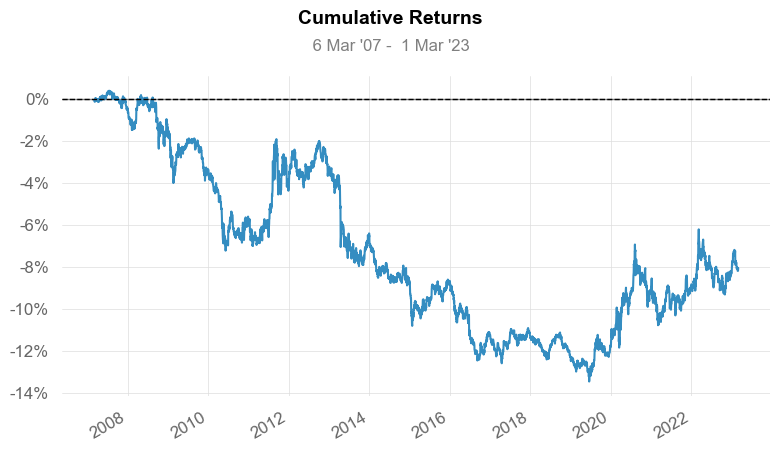

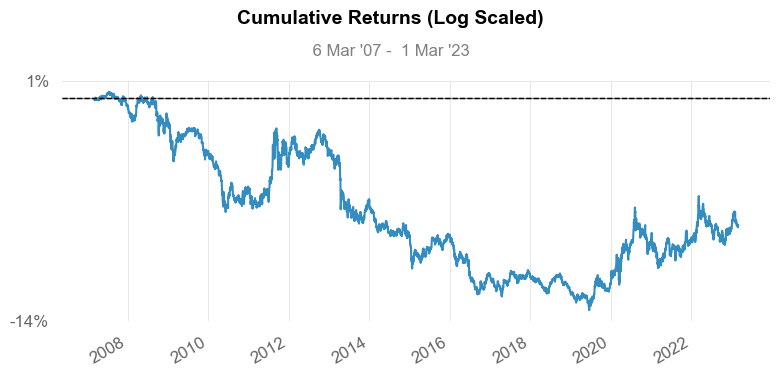

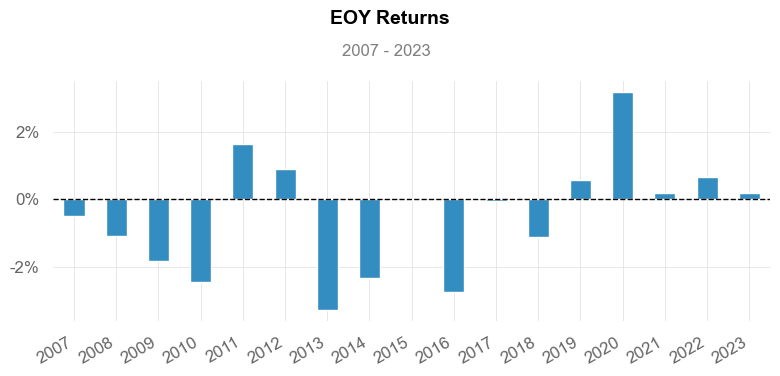

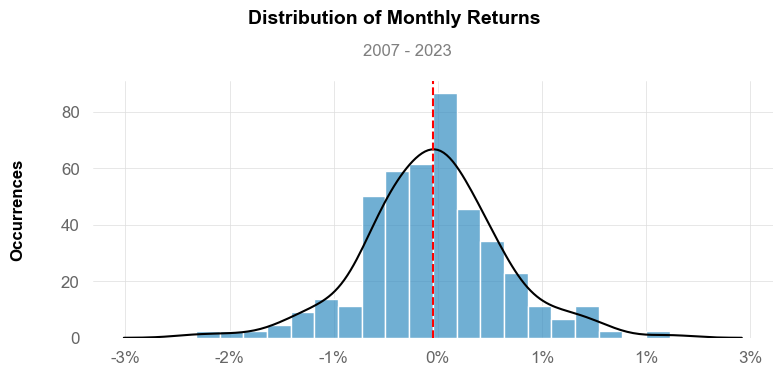

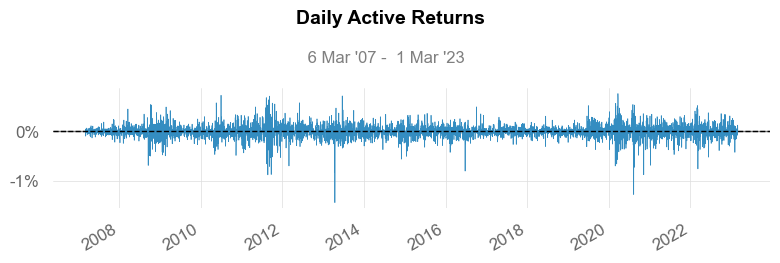

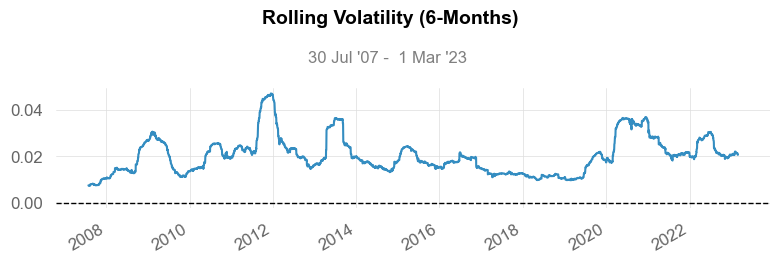

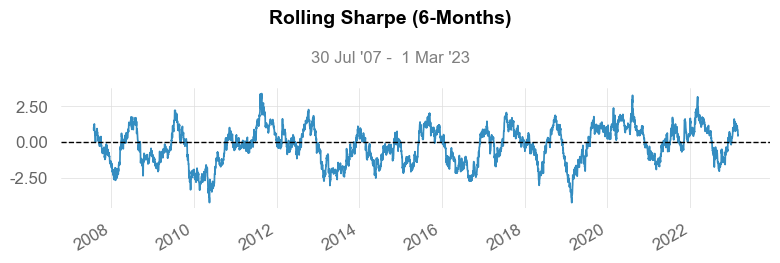

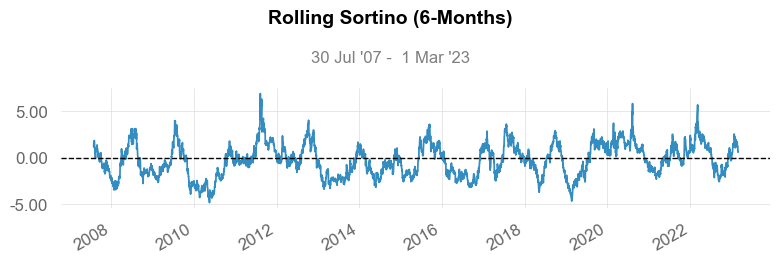

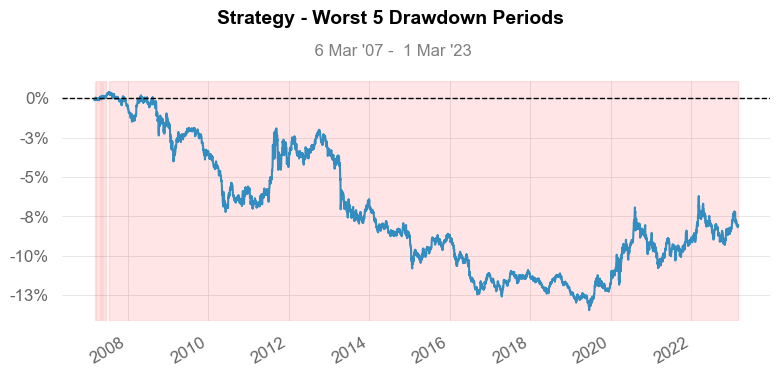

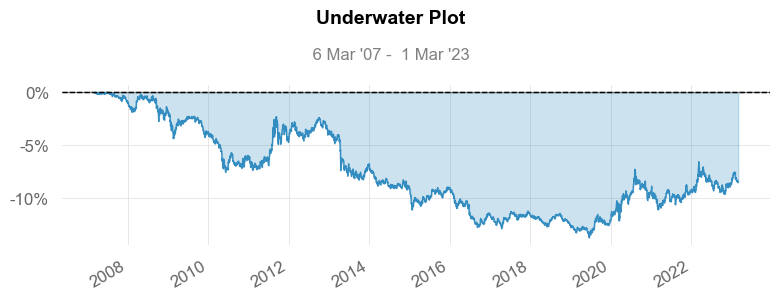

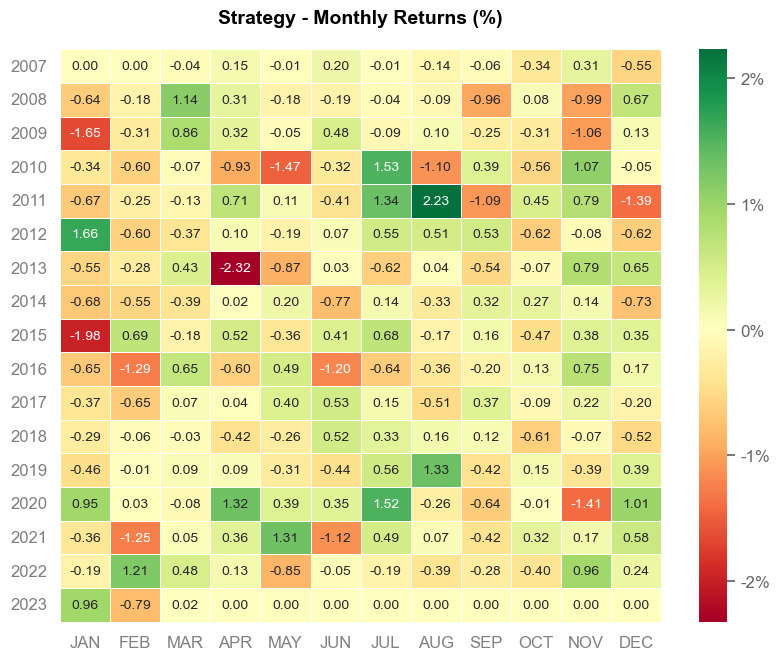

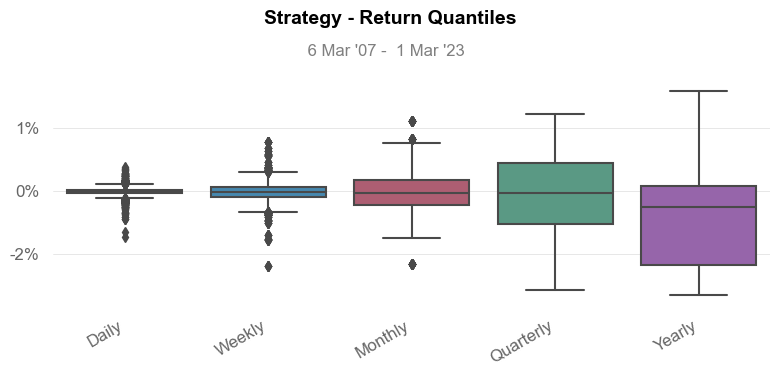

In [53]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [54]:
TF = 'M30'

In [55]:
data_1 = XAUUSD[TF]

In [56]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

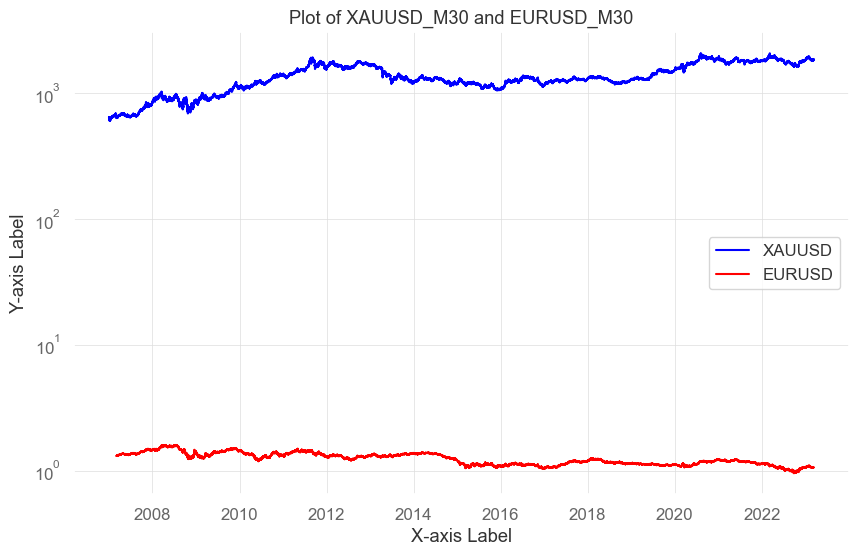

In [57]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [58]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [59]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          2.077e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:58:56   Log-Likelihood:                     -1.4852e+06
No. Observations:              199678   AIC:                                  2.970e+06
Df Residuals:                  199677   BIC:                                  2.970e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.6714      0.736   1441.290      0.000    1059.229    1062.114
==============================================================================
Omnibus:                     6316.512   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4537.871
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
result = KF.Run()

### Save Result Backtest 

In [61]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [62]:
filename = f'{Currency_Pair}_{TF}.csv'

In [63]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -8.57%
CAGR﹪                     -0.39%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.67%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -14.31%
Longest DD Days            5706
Volatility (ann.)          2.15%
Calmar                     -0.03
Skew                       -0.76
Kurtosis                   10.93

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.53%
Kelly Criterion            -1.94%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-18,2023-03-01,5706,-14.305479,-13.679296
2,2007-05-18,2007-06-01,2007-06-21,35,-0.183204,-0.182765
3,2007-05-03,2007-05-08,2007-05-14,12,-0.182080,-0.159274
4,2007-03-16,2007-04-16,2007-04-25,41,-0.174351,-0.167287
5,2007-03-08,2007-03-08,2007-03-12,5,-0.082224,-0.080124


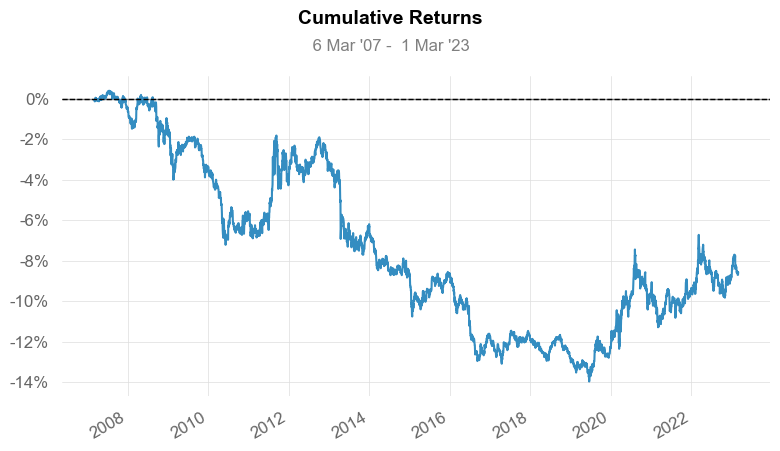

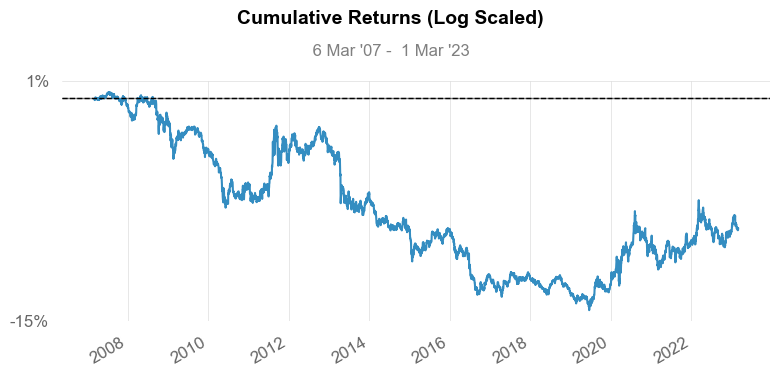

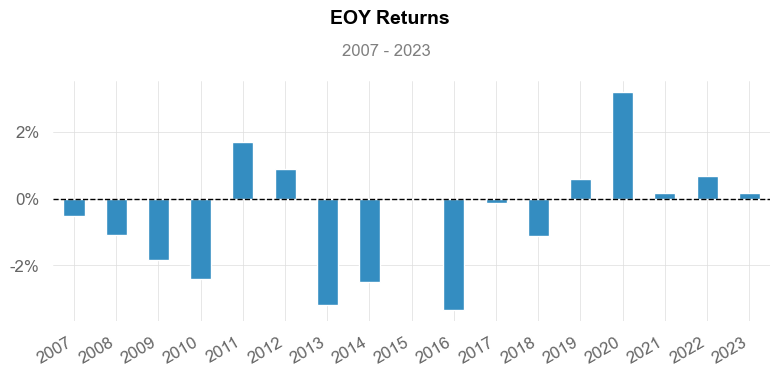

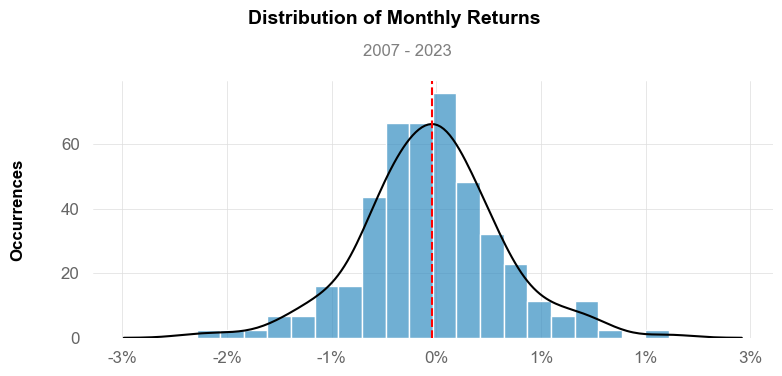

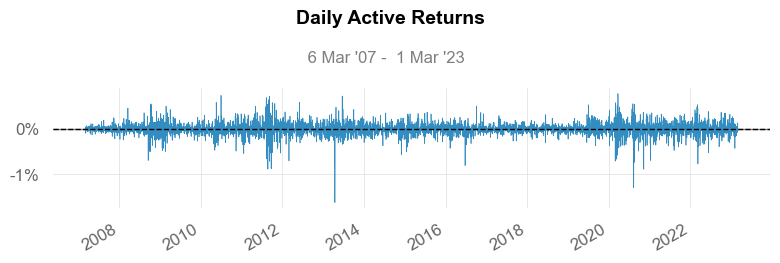

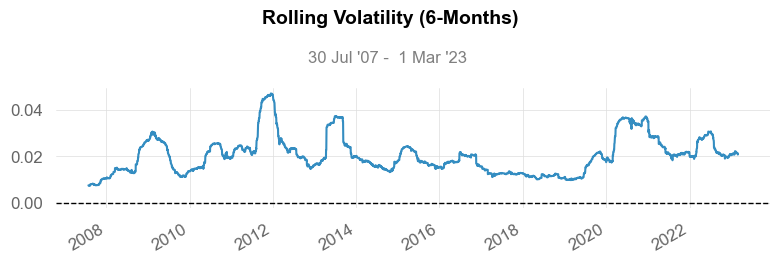

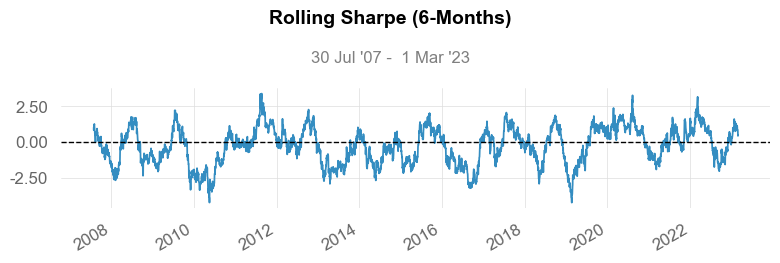

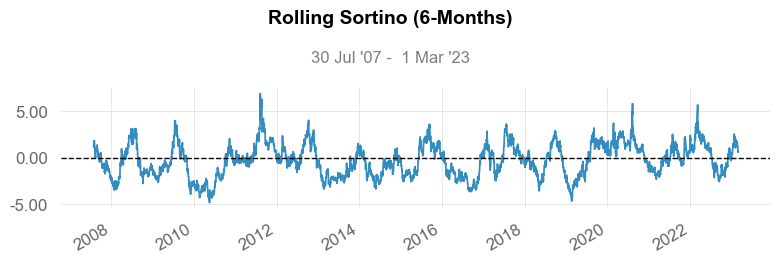

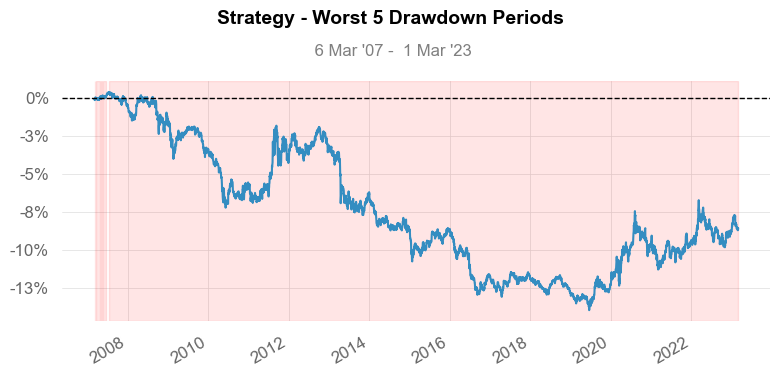

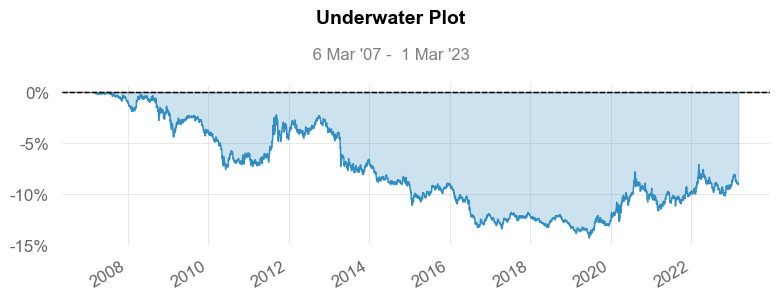

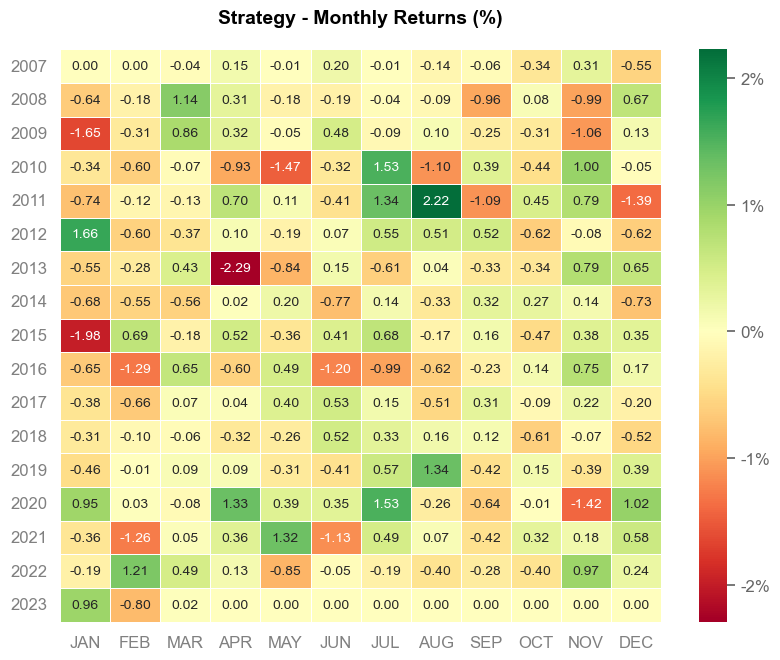

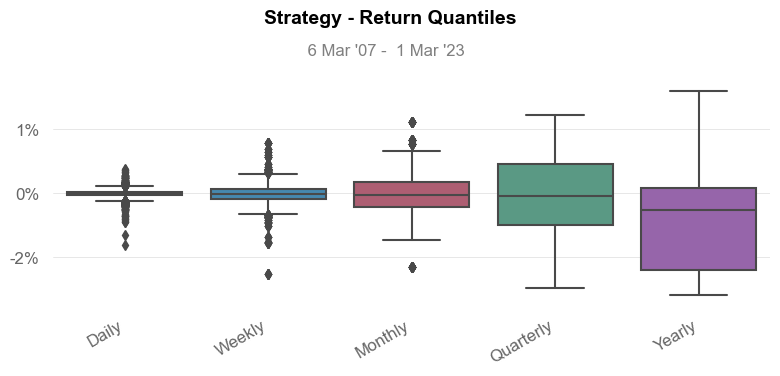

In [64]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())